# 💤 Clustering My Bedtime Routines
This notebook simulates bedtime data and applies clustering analysis with visualizations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib as mpl


## 📊 Step 1: Simulate Bedtime Data

In [2]:
np.random.seed(42)
early = np.random.normal(loc=22.5, scale=0.5, size=7)  # Early sleepers
late = np.random.normal(loc=1.5, scale=0.4, size=7)    # Late sleepers
random = np.random.uniform(21, 3, size=6)              # Irregular (crosses midnight)
bedtimes = np.concatenate([early, late, random]) % 24 #하루 24시간 범위로 맞추기 위한 처리

## 🤖 Step 2: Apply KMeans Clustering

In [3]:
X = bedtimes.reshape(-1, 1) #2D처리
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(X) #3개의 클러스터로 분류
labels = kmeans.labels_

df = pd.DataFrame({
    "Bedtime": bedtimes,
    "Cluster": labels
})


## 📈 Step 3: Histogram of Bedtimes by Cluster

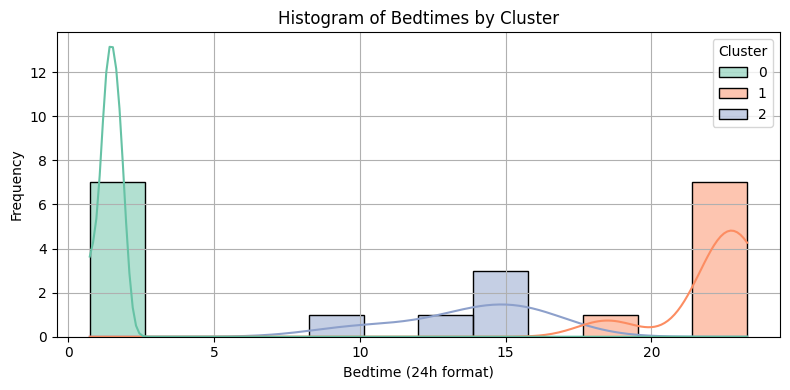

In [4]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="Bedtime", hue="Cluster", palette="Set2", bins=12, kde=True)
plt.title("Histogram of Bedtimes by Cluster")
plt.xlabel("Bedtime (24h format)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid(True)
plt.show()
#새벽에 자는 사람들과 밤 11시즈음에 자는 사람들 간의 차이가 너무 크게 처리됨.

## 🌀 Step 4: Circular Plot (Polar Coordinates)

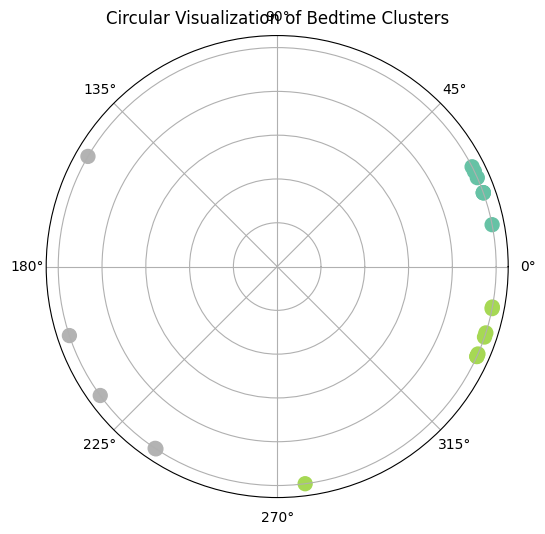

In [7]:
theta = (bedtimes / 24) * 2 * np.pi #시계방향으로의 각도
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.scatter(theta, np.ones_like(theta), c=labels, cmap="Set2", s=100)
ax.set_title("Circular Visualization of Bedtime Clusters", va='bottom')
ax.set_yticklabels([])
plt.show()
#0도: 자정/ 90도: 오전6시/ 180도: 12시 ...

## ✨ Step 5: Interactive Plot with Plotly

plotly: 마우스 오버, 줌, 클릭이 가능한 인터랙티브 시각화 도구

In [6]:
df_sorted = df.sort_values("Bedtime").reset_index(drop=True)
df_sorted["Index"] = df_sorted.index + 1
fig_plotly = px.scatter(df_sorted, x="Index", y="Bedtime", color=df_sorted["Cluster"].astype(str),
                        title="Interactive View of Bedtime Clustering",
                        labels={"Cluster": "Cluster", "Index": "Day", "Bedtime": "Bedtime (hour)"})
fig_plotly.update_traces(marker=dict(size=12))
fig_plotly.update_layout(legend_title_text='Cluster')
fig_plotly.show()